In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [16]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

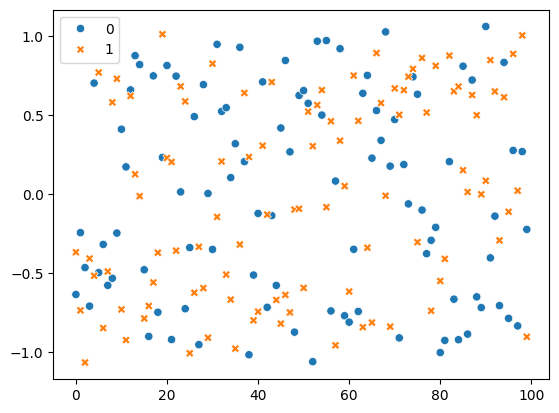

In [18]:
sns.scatterplot(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [20]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\DL\100-days-DL_CampusX\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

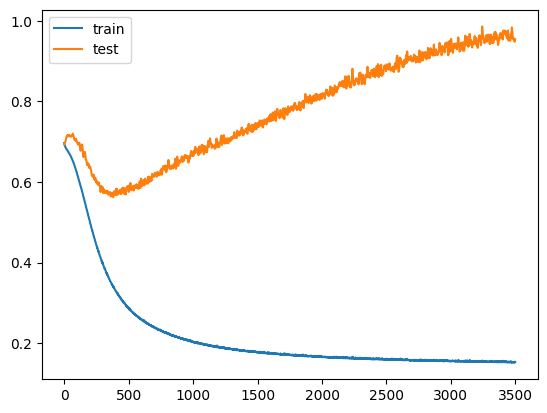

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 747us/step


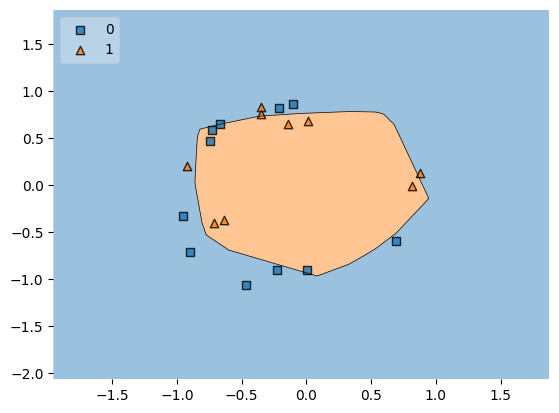

In [25]:
plot_decision_regions(X_test, y_test.ravel(), clf= model, legend=2)
plt.show()

# Early Stopping

In [26]:
model = Sequential()

model.add(Dense(256,input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\DL\100-days-DL_CampusX\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=5000, callbacks=callback)

Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5742 - loss: 0.6780 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5234 - loss: 0.6802 - val_accuracy: 0.3500 - val_loss: 0.7229
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5453 - loss: 0.6811 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5648 - loss: 0.6805 - val_accuracy: 0.3500 - val_loss: 0.7224
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6094 - loss: 0.6651 - val_accuracy: 0.3500 - val_loss: 0.7224
Epoch 6/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5453 - loss: 0.6764 - val_accuracy: 0.3500 - val_loss: 0.7216
Epoch 7/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5883 - loss: 0.6738 - val_accuracy: 0.4000 - val_loss: 0.7211
Epoch 8/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5469 - loss: 0.6792 - val_accuracy: 0.4000 - v

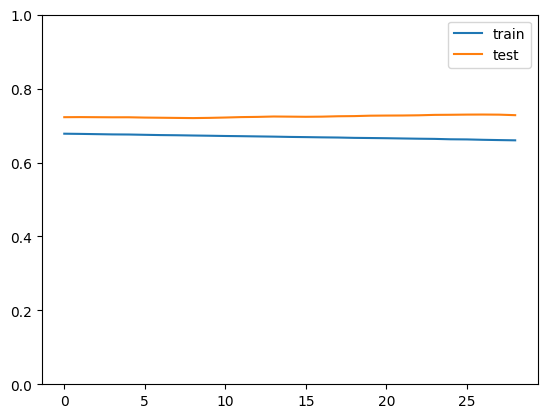

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.ylim(0,1)
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


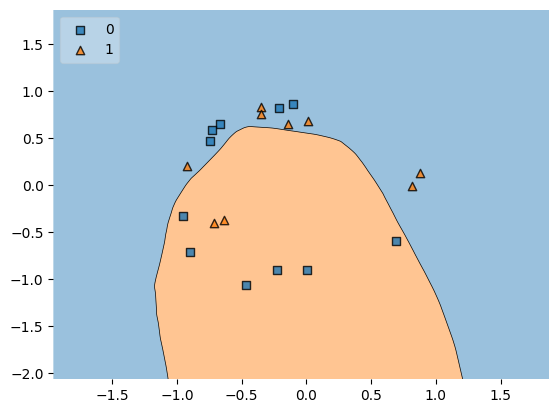

In [33]:
plot_decision_regions(X_test, y_test.ravel(), clf= model, legend=2)
plt.show()